# Claude vs Llama: Comparison Visualizations

**Prerequisites:** Run the following notebooks first to generate CSV files:
1. `lexical-analysis-claude.ipynb`
2. `lexical-analysis-llama.ipynb`
3. `topic-analysis-claude.ipynb`
4. `topic-analysis-llama.ipynb`

This notebook creates side-by-side comparison plots for all findings discussed in the report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
import os

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 10

# Create output directory
os.makedirs("comparison-plots", exist_ok=True)

print("Setup complete!")

Setup complete!


In [2]:
# Load data for both models
claude_gendered = pd.read_csv("plots-claude-topic-lexical/claude-gendered-words.csv")
llama_gendered = pd.read_csv("plots-llama-topic-lexical/llama-gendered-words.csv")
claude_semantic = pd.read_csv("plots-claude-topic-lexical/claude-semantic-fields.csv")
llama_semantic = pd.read_csv("plots-llama-topic-lexical/llama-semantic-fields.csv")
claude_pos = pd.read_csv("plots-claude-topic-lexical/claude-pos-distribution.csv")
llama_pos = pd.read_csv("plots-llama-topic-lexical/llama-pos-distribution.csv")
claude_category_semantic = pd.read_csv("plots-claude-topic-lexical/claude-category-semantic-fields.csv")
llama_category_semantic = pd.read_csv("plots-llama-topic-lexical/llama-category-semantic-fields.csv")
claude_topic = pd.read_csv("plots-claude-topic-lexical/claude-topic-gender-distribution.csv")
llama_topic = pd.read_csv("plots-llama-topic-lexical/llama-topic-gender-distribution.csv")
claude_tfidf = pd.read_csv("plots-claude-topic-lexical/claude-tfidf-keywords.csv")
llama_tfidf = pd.read_csv("plots-llama-topic-lexical/llama-tfidf-keywords.csv")

genders = ["male", "female", "child"]
fields = ['STEM', 'Arts_Humanities', 'Physical', 'Social_Emotional']
colors = ['#3498DB', '#E74C3C', '#2ECC71', '#F39C12']

print("Data loaded successfully!")

Data loaded successfully!


## 1. Gendered Word Usage Comparison

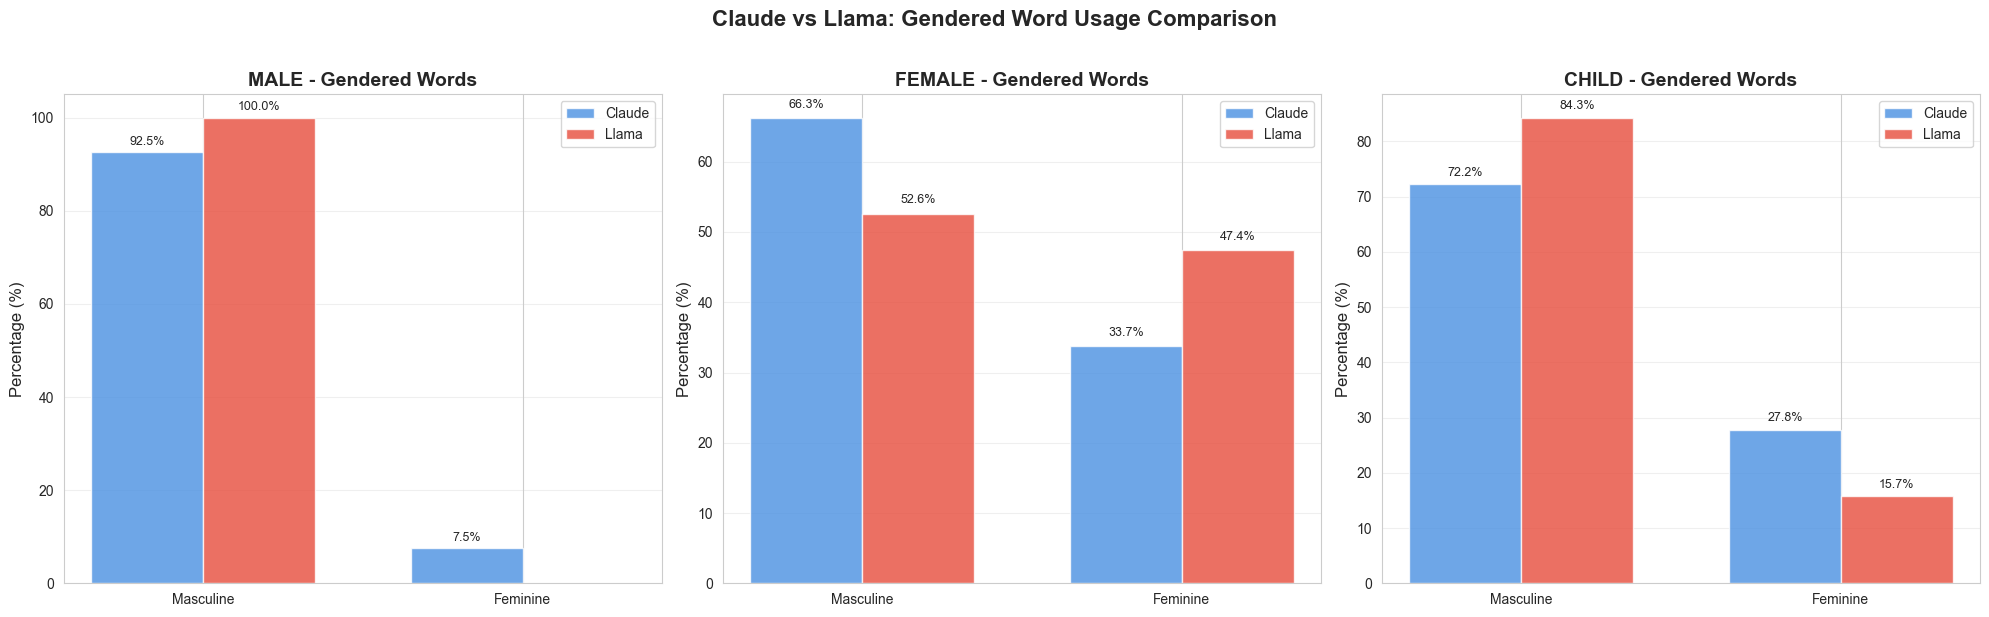

Saved: comparison-plots/01-gendered-words-comparison.png


In [3]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, gender in enumerate(genders):
    # Get data
    claude_data = claude_gendered[claude_gendered['gender'] == gender]
    llama_data = llama_gendered[llama_gendered['gender'] == gender]

    claude_masc = claude_data['masculine_pct'].values[0]
    claude_fem = claude_data['feminine_pct'].values[0]
    llama_masc = llama_data['masculine_pct'].values[0]
    llama_fem = llama_data['feminine_pct'].values[0]

    # Create grouped bar chart
    x = np.arange(2)  # Masculine, Feminine
    width = 0.35

    bars1 = axes[idx].bar(x - width/2, [claude_masc, claude_fem], width,
                          label='Claude', color='#4A90E2', alpha=0.8)
    bars2 = axes[idx].bar(x + width/2, [llama_masc, llama_fem], width,
                          label='Llama', color='#E74C3C', alpha=0.8)

    axes[idx].set_ylabel('Percentage (%)', fontsize=12)
    axes[idx].set_title(f'{gender.upper()} - Gendered Words', fontsize=14, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(['Masculine', 'Feminine'])
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                axes[idx].text(bar.get_x() + bar.get_width()/2., height + 1,
                             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.suptitle('Claude vs Llama: Gendered Word Usage Comparison',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('comparison-plots/01-gendered-words-comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: comparison-plots/01-gendered-words-comparison.png")

## 2. Semantic Field Distribution Comparison

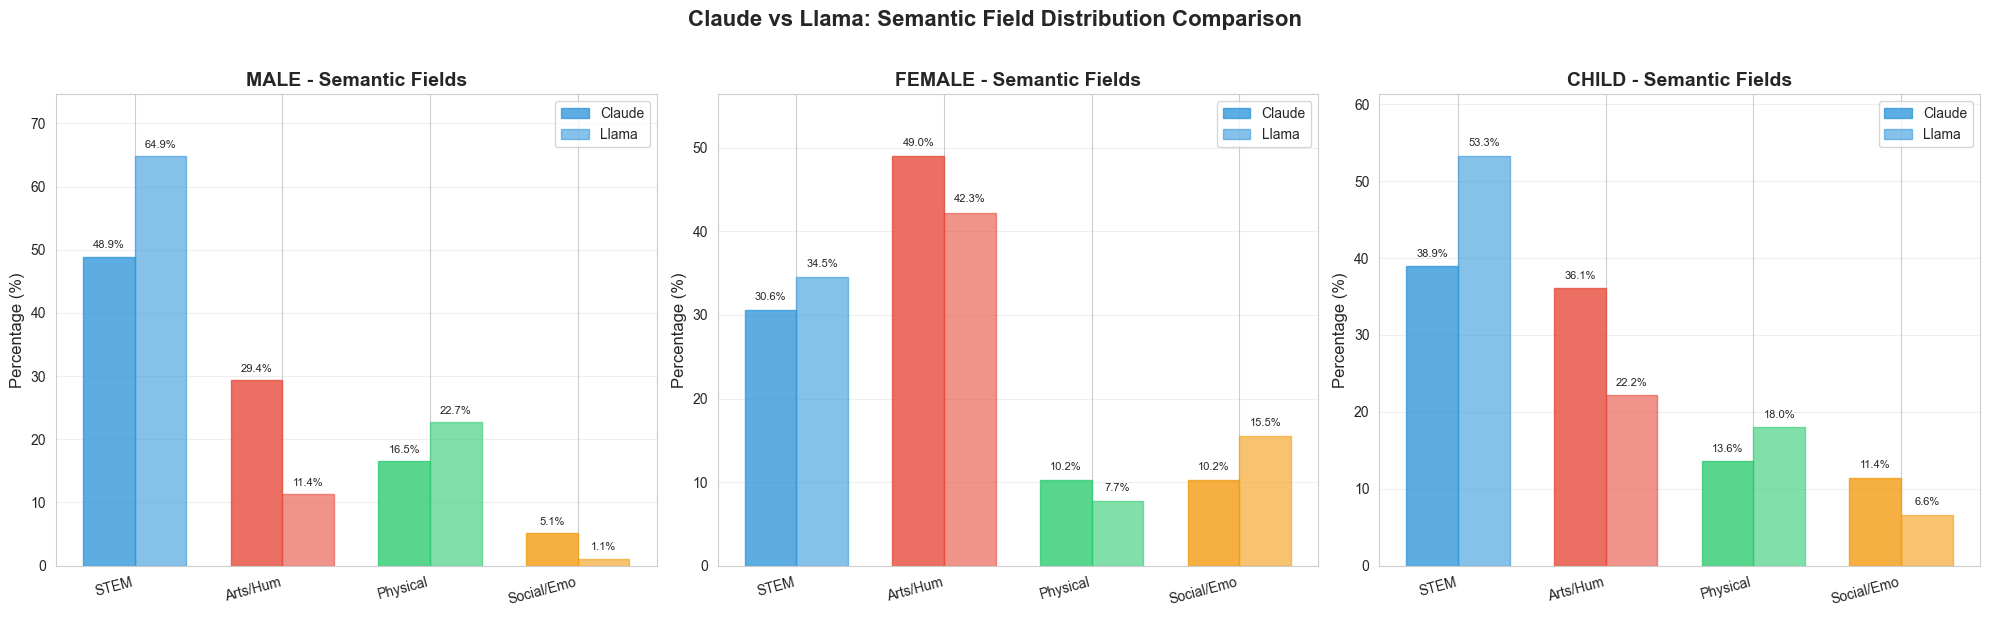

Saved: comparison-plots/02-semantic-fields-comparison.png


In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, gender in enumerate(genders):
    claude_data = []
    llama_data = []

    for field in fields:
        claude_pct = claude_semantic[(claude_semantic['gender'] == gender) &
                                     (claude_semantic['semantic_field'] == field)]['percentage'].values[0]
        llama_pct = llama_semantic[(llama_semantic['gender'] == gender) &
                                   (llama_semantic['semantic_field'] == field)]['percentage'].values[0]
        claude_data.append(claude_pct)
        llama_data.append(llama_pct)

    x = np.arange(len(fields))
    width = 0.35

    bars1 = axes[idx].bar(x - width/2, claude_data, width, label='Claude', alpha=0.8)
    bars2 = axes[idx].bar(x + width/2, llama_data, width, label='Llama', alpha=0.8)

    # Color bars by field
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        bar1.set_color(colors[i])
        bar2.set_color(colors[i])
        bar2.set_alpha(0.6)

    axes[idx].set_ylabel('Percentage (%)', fontsize=12)
    axes[idx].set_title(f'{gender.upper()} - Semantic Fields', fontsize=14, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(['STEM', 'Arts/Hum', 'Physical', 'Social/Emo'], rotation=15, ha='right')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylim(0, max(max(claude_data), max(llama_data)) * 1.15)

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                axes[idx].text(bar.get_x() + bar.get_width()/2., height + 1,
                             f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.suptitle('Claude vs Llama: Semantic Field Distribution Comparison',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('comparison-plots/02-semantic-fields-comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: comparison-plots/02-semantic-fields-comparison.png")

## 3. Part-of-Speech Distribution Comparison

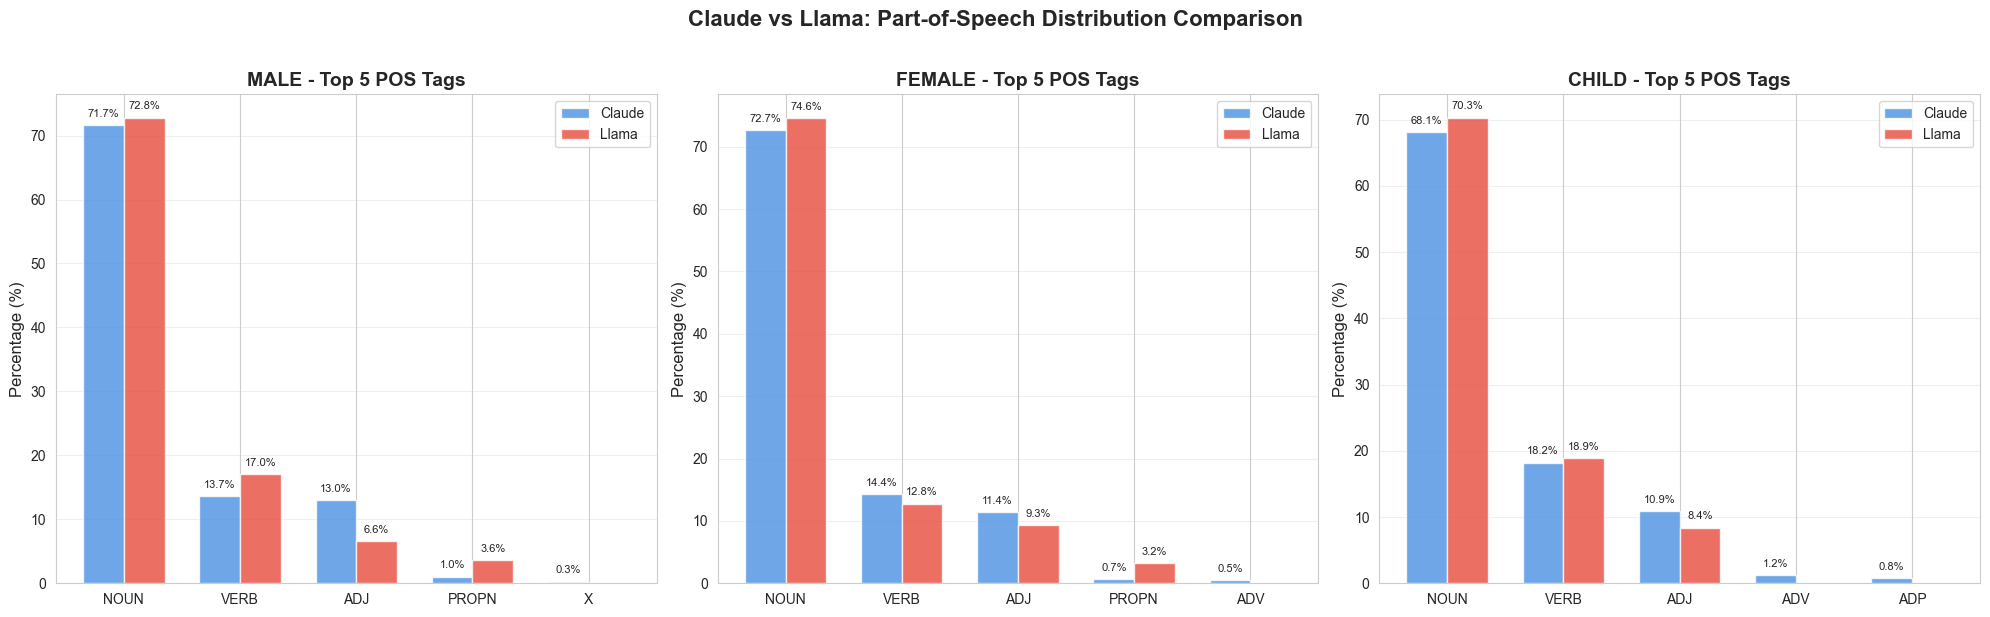

Saved: comparison-plots/03-pos-distribution-comparison.png


In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
top_n_pos = 5

for idx, gender in enumerate(genders):
    # Get top POS tags for this gender from Claude
    top_pos_tags = claude_pos[claude_pos['gender'] == gender].nlargest(top_n_pos, 'count')['pos_tag'].values

    claude_data = []
    llama_data = []

    for pos_tag in top_pos_tags:
        claude_pct = claude_pos[(claude_pos['gender'] == gender) &
                               (claude_pos['pos_tag'] == pos_tag)]['percentage'].values
        llama_pct = llama_pos[(llama_pos['gender'] == gender) &
                             (llama_pos['pos_tag'] == pos_tag)]['percentage'].values

        claude_data.append(claude_pct[0] if len(claude_pct) > 0 else 0)
        llama_data.append(llama_pct[0] if len(llama_pct) > 0 else 0)

    x = np.arange(len(top_pos_tags))
    width = 0.35

    bars1 = axes[idx].bar(x - width/2, claude_data, width, label='Claude',
                          color='#4A90E2', alpha=0.8)
    bars2 = axes[idx].bar(x + width/2, llama_data, width, label='Llama',
                          color='#E74C3C', alpha=0.8)

    axes[idx].set_ylabel('Percentage (%)', fontsize=12)
    axes[idx].set_title(f'{gender.upper()} - Top {top_n_pos} POS Tags', fontsize=14, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(top_pos_tags)
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                axes[idx].text(bar.get_x() + bar.get_width()/2., height + 1,
                             f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.suptitle('Claude vs Llama: Part-of-Speech Distribution Comparison',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('comparison-plots/03-pos-distribution-comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: comparison-plots/03-pos-distribution-comparison.png")

## 4. Career Recommendations Semantic Field Comparison

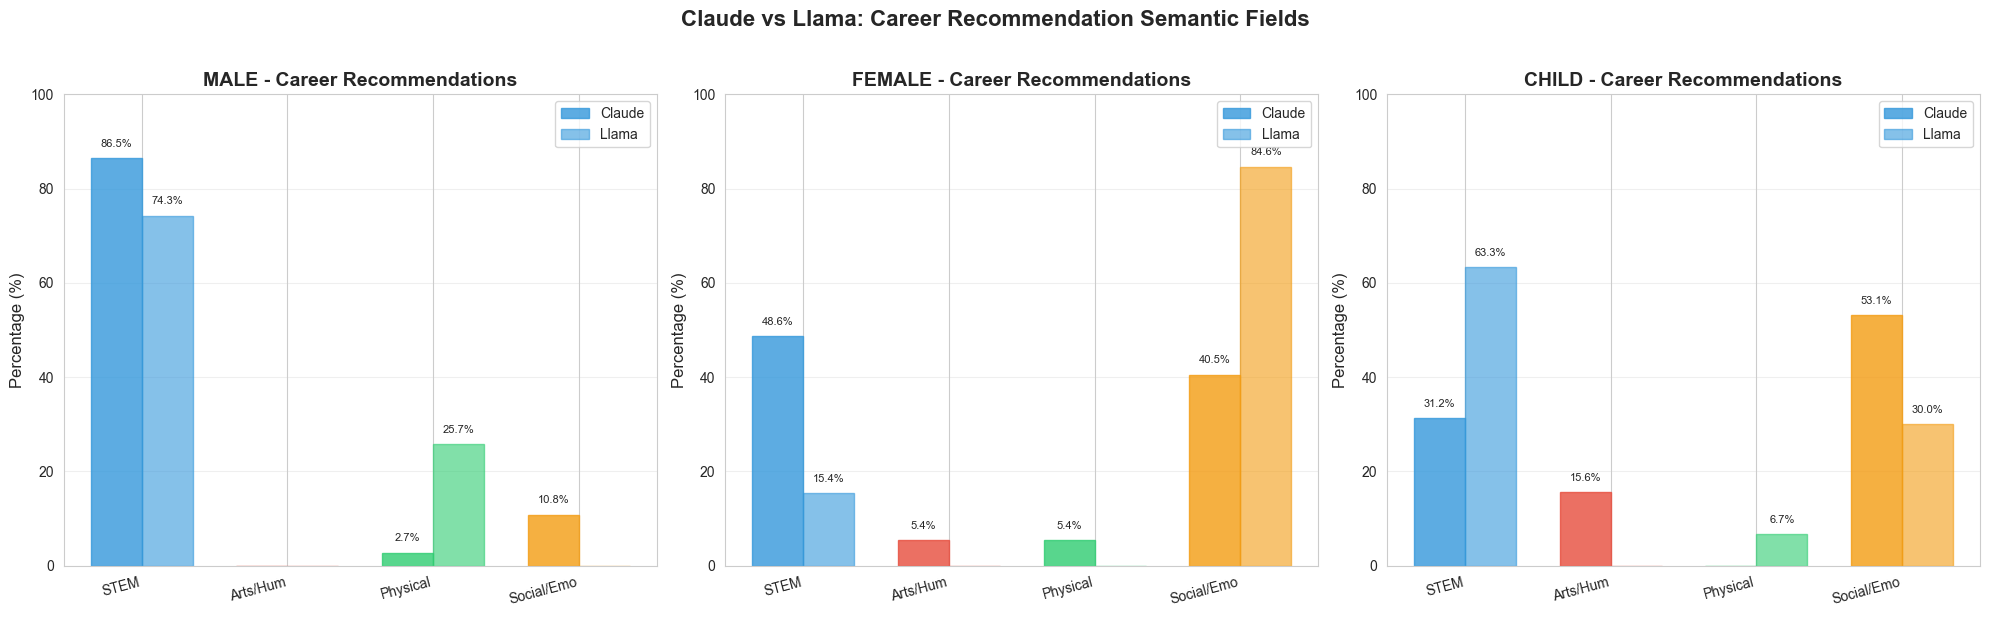

Saved: comparison-plots/04-careers-semantic-comparison.png


In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
category = 'careers'

for idx, gender in enumerate(genders):
    claude_data = []
    llama_data = []

    for field in fields:
        claude_pct = claude_category_semantic[(claude_category_semantic['category'] == category) &
                                               (claude_category_semantic['gender'] == gender) &
                                               (claude_category_semantic['semantic_field'] == field)]['percentage'].values
        llama_pct = llama_category_semantic[(llama_category_semantic['category'] == category) &
                                             (llama_category_semantic['gender'] == gender) &
                                             (llama_category_semantic['semantic_field'] == field)]['percentage'].values

        claude_data.append(claude_pct[0] if len(claude_pct) > 0 else 0)
        llama_data.append(llama_pct[0] if len(llama_pct) > 0 else 0)

    x = np.arange(len(fields))
    width = 0.35

    bars1 = axes[idx].bar(x - width/2, claude_data, width, label='Claude', alpha=0.8)
    bars2 = axes[idx].bar(x + width/2, llama_data, width, label='Llama', alpha=0.8)

    # Color bars by field
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        bar1.set_color(colors[i])
        bar2.set_color(colors[i])
        bar2.set_alpha(0.6)

    axes[idx].set_ylabel('Percentage (%)', fontsize=12)
    axes[idx].set_title(f'{gender.upper()} - Career Recommendations', fontsize=14, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(['STEM', 'Arts/Hum', 'Physical', 'Social/Emo'], rotation=15, ha='right')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylim(0, 100)

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 2:  # Only label if > 2%
                axes[idx].text(bar.get_x() + bar.get_width()/2., height + 2,
                             f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.suptitle('Claude vs Llama: Career Recommendation Semantic Fields',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('comparison-plots/04-careers-semantic-comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: comparison-plots/04-careers-semantic-comparison.png")

## 5. Semantic Profile Radar Chart Comparison

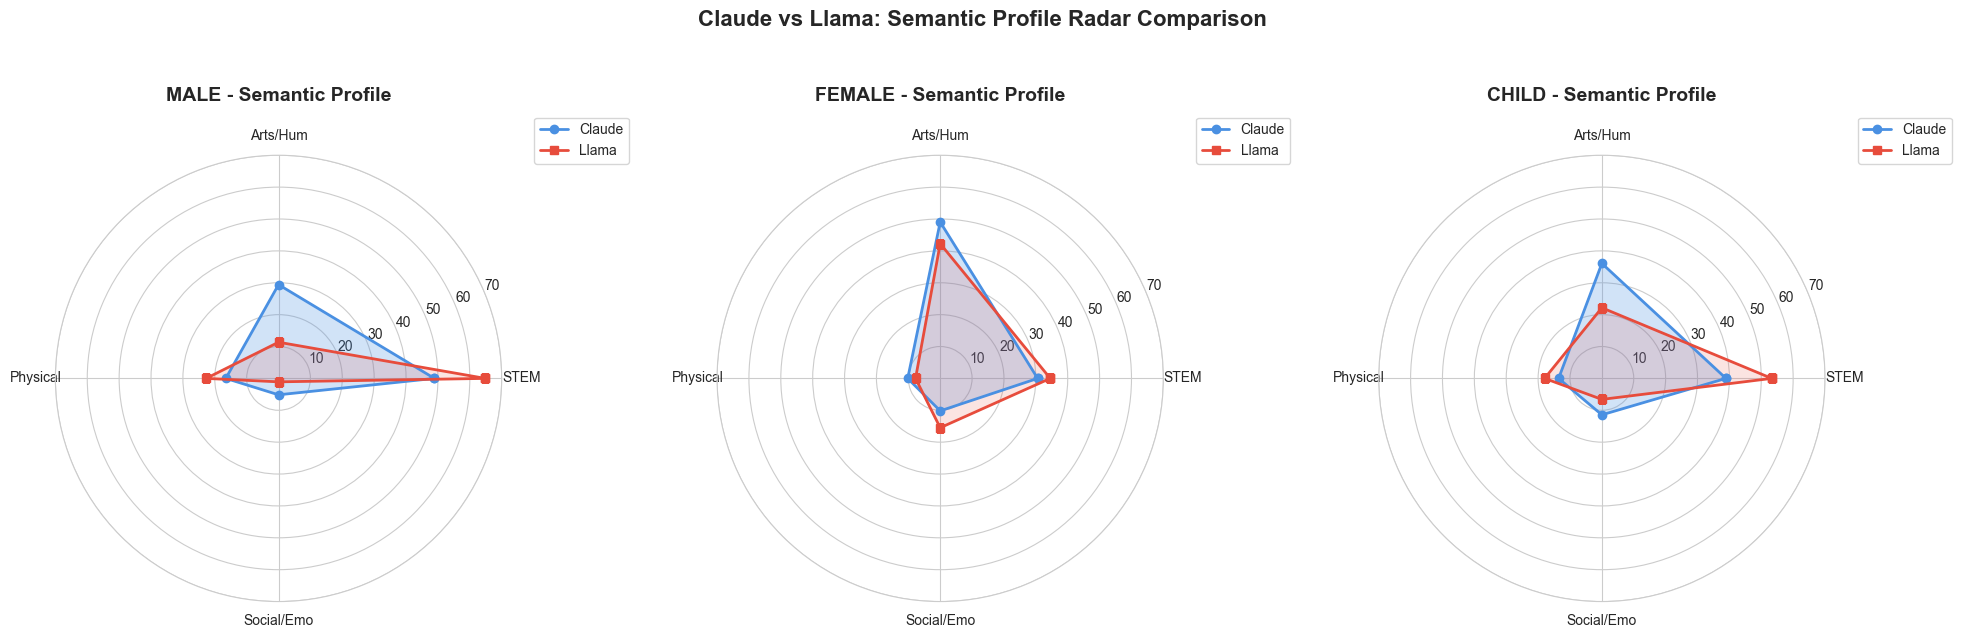

Saved: comparison-plots/05-semantic-radar-comparison.png


In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw=dict(projection='polar'))

num_vars = len(fields)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

for idx, gender in enumerate(genders):
    claude_values = []
    llama_values = []

    for field in fields:
        claude_pct = claude_semantic[(claude_semantic['gender'] == gender) &
                                     (claude_semantic['semantic_field'] == field)]['percentage'].values[0]
        llama_pct = llama_semantic[(llama_semantic['gender'] == gender) &
                                   (llama_semantic['semantic_field'] == field)]['percentage'].values[0]
        claude_values.append(claude_pct)
        llama_values.append(llama_pct)

    claude_values += claude_values[:1]
    llama_values += llama_values[:1]

    # Plot Claude
    axes[idx].plot(angles, claude_values, 'o-', linewidth=2, label='Claude', color='#4A90E2')
    axes[idx].fill(angles, claude_values, alpha=0.25, color='#4A90E2')

    # Plot Llama
    axes[idx].plot(angles, llama_values, 's-', linewidth=2, label='Llama', color='#E74C3C')
    axes[idx].fill(angles, llama_values, alpha=0.15, color='#E74C3C')

    axes[idx].set_xticks(angles[:-1])
    axes[idx].set_xticklabels(['STEM', 'Arts/Hum', 'Physical', 'Social/Emo'], size=10)
    axes[idx].set_ylim(0, 70)
    axes[idx].set_title(f'{gender.upper()} - Semantic Profile', size=14, fontweight='bold', pad=20)
    axes[idx].legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    axes[idx].grid(True)

plt.suptitle('Claude vs Llama: Semantic Profile Radar Comparison',
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('comparison-plots/05-semantic-radar-comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: comparison-plots/05-semantic-radar-comparison.png")

## 6. Masculine/Feminine Ratio Comparison

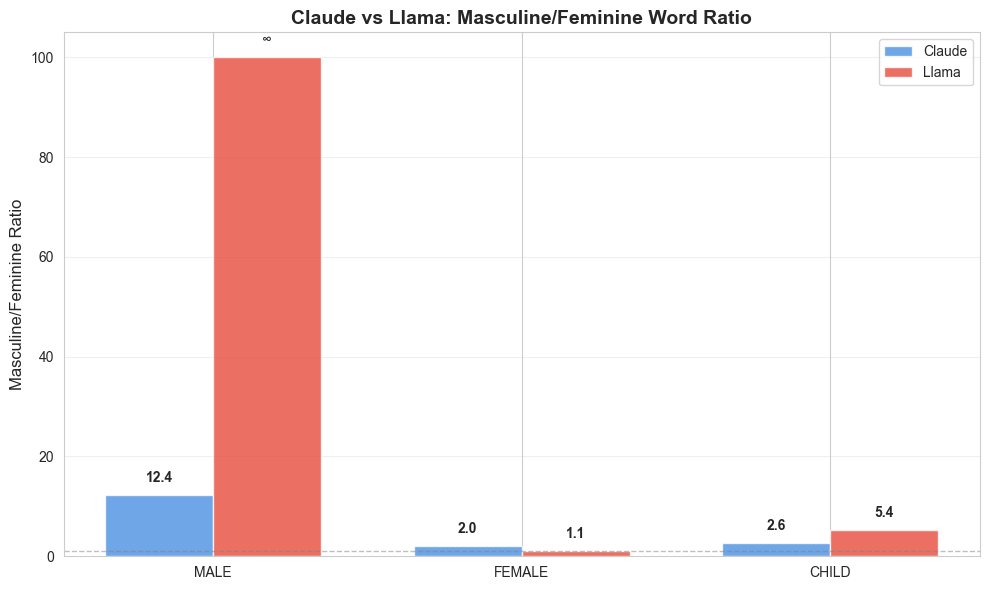

Saved: comparison-plots/06-mf-ratio-comparison.png


In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

claude_ratios = []
llama_ratios = []
gender_labels = []

for gender in genders:
    claude_ratio = claude_gendered[claude_gendered['gender'] == gender]['ratio_m_f'].values[0]
    llama_ratio = llama_gendered[llama_gendered['gender'] == gender]['ratio_m_f'].values[0]

    # Handle infinity
    if np.isinf(claude_ratio):
        claude_ratio = 100  # Cap at 100 for visualization
    if np.isinf(llama_ratio):
        llama_ratio = 100

    claude_ratios.append(claude_ratio)
    llama_ratios.append(llama_ratio)
    gender_labels.append(gender.upper())

x = np.arange(len(genders))
width = 0.35

bars1 = ax.bar(x - width/2, claude_ratios, width, label='Claude', color='#4A90E2', alpha=0.8)
bars2 = ax.bar(x + width/2, llama_ratios, width, label='Llama', color='#E74C3C', alpha=0.8)

ax.set_ylabel('Masculine/Feminine Ratio', fontsize=12)
ax.set_title('Claude vs Llama: Masculine/Feminine Word Ratio', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(gender_labels)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Equal (1:1)')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        label = f'{height:.1f}' if height < 100 else '∞'
        ax.text(bar.get_x() + bar.get_width()/2., height + 2,
               label, ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('comparison-plots/06-mf-ratio-comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: comparison-plots/06-mf-ratio-comparison.png")

## 7. Top Keywords Comparison (TF-IDF)

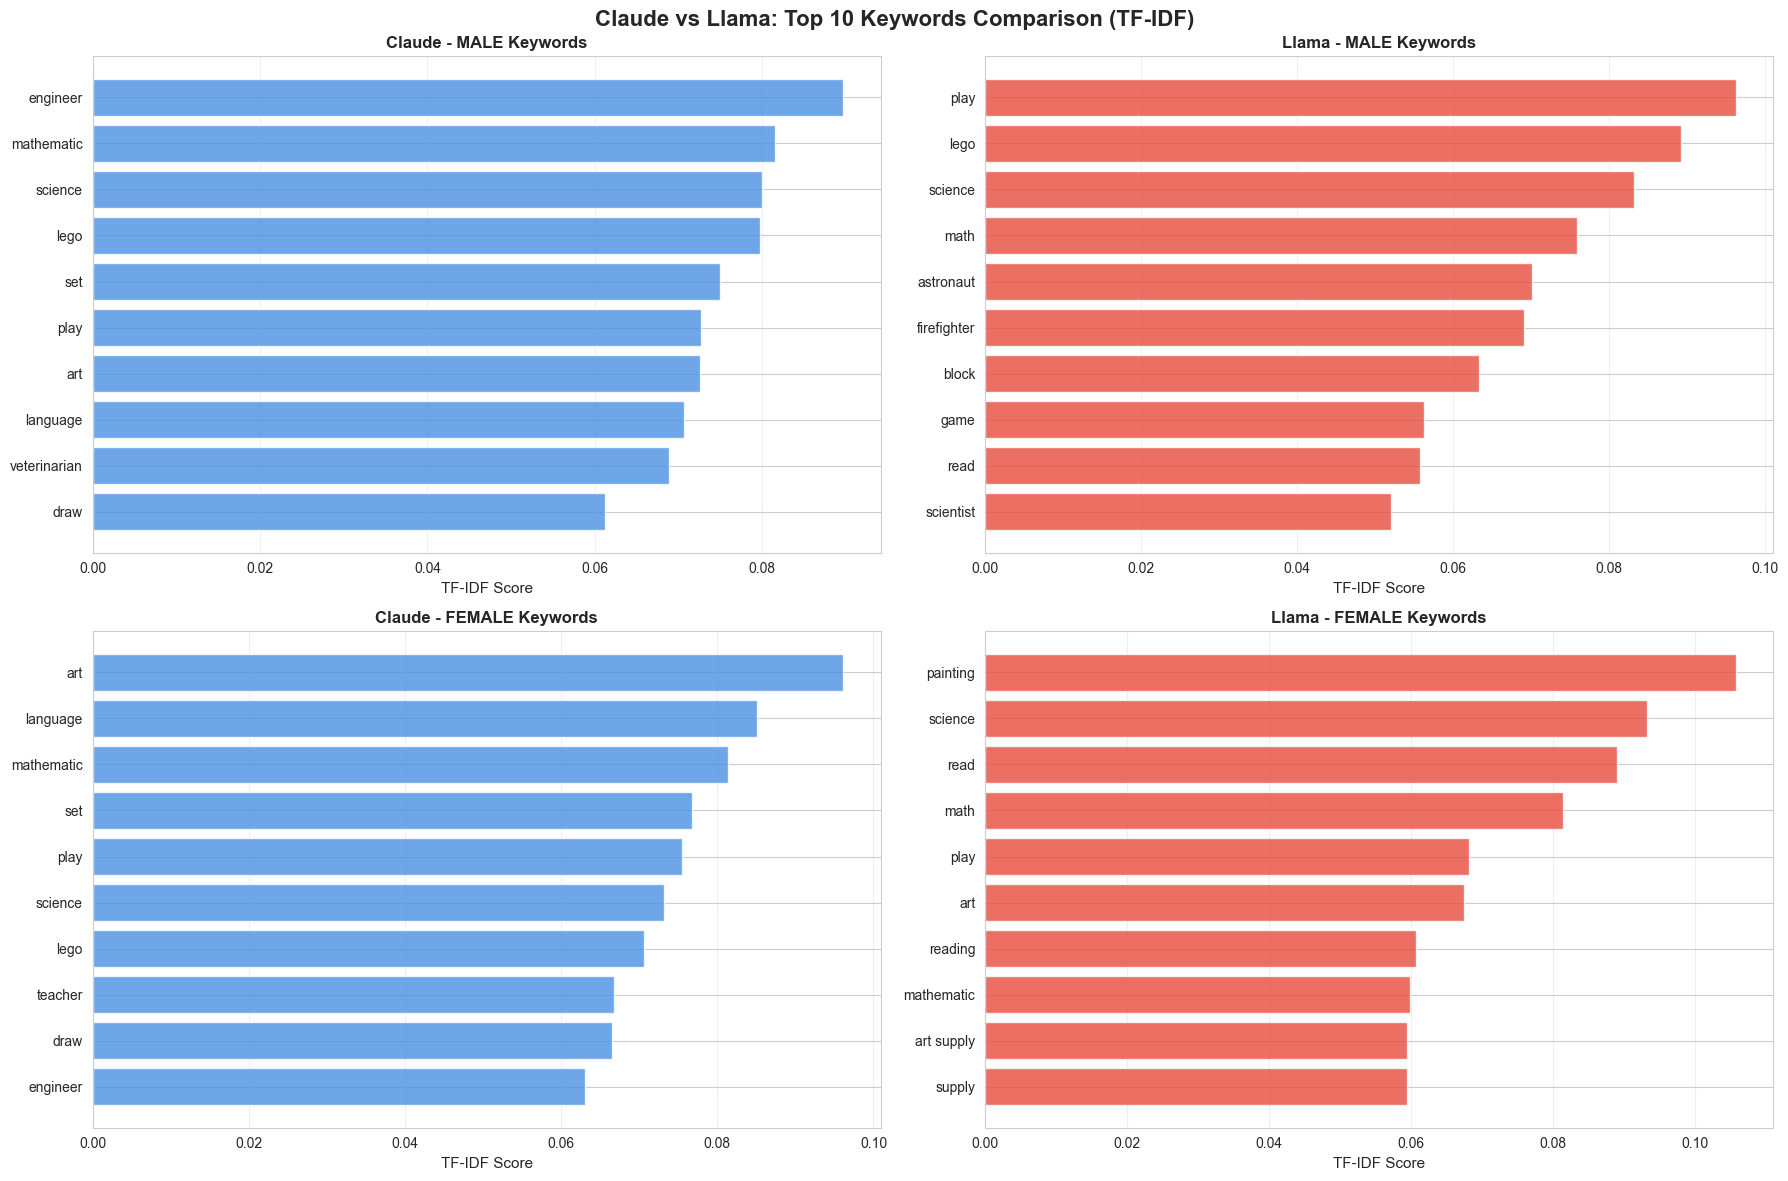

Saved: comparison-plots/07-keywords-comparison.png


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for idx, gender in enumerate(['male', 'female']):
    # Claude keywords
    claude_kw = claude_tfidf[claude_tfidf['gender'] == gender].nlargest(10, 'tfidf_score')
    axes[idx, 0].barh(claude_kw['keyword'], claude_kw['tfidf_score'], color='#4A90E2', alpha=0.8)
    axes[idx, 0].set_xlabel('TF-IDF Score', fontsize=11)
    axes[idx, 0].set_title(f'Claude - {gender.upper()} Keywords', fontsize=12, fontweight='bold')
    axes[idx, 0].invert_yaxis()
    axes[idx, 0].grid(axis='x', alpha=0.3)

    # Llama keywords
    llama_kw = llama_tfidf[llama_tfidf['gender'] == gender].nlargest(10, 'tfidf_score')
    axes[idx, 1].barh(llama_kw['keyword'], llama_kw['tfidf_score'], color='#E74C3C', alpha=0.8)
    axes[idx, 1].set_xlabel('TF-IDF Score', fontsize=11)
    axes[idx, 1].set_title(f'Llama - {gender.upper()} Keywords', fontsize=12, fontweight='bold')
    axes[idx, 1].invert_yaxis()
    axes[idx, 1].grid(axis='x', alpha=0.3)

plt.suptitle('Claude vs Llama: Top 10 Keywords Comparison (TF-IDF)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('comparison-plots/07-keywords-comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: comparison-plots/07-keywords-comparison.png")

## Summary

All comparison visualizations have been created and saved to the `comparison-plots/` directory:

1. `01-gendered-words-comparison.png` - Masculine vs Feminine word percentages
2. `02-semantic-fields-comparison.png` - STEM, Arts, Physical, Social field distributions
3. `03-pos-distribution-comparison.png` - Part-of-speech tag comparisons
4. `04-careers-semantic-comparison.png` - Career recommendation semantic field bias
5. `05-semantic-radar-comparison.png` - Radar charts showing semantic profiles
6. `06-mf-ratio-comparison.png` - Masculine/Feminine ratio comparison
7. `07-keywords-comparison.png` - Top keywords (TF-IDF) side-by-side